## Project Building

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from flask import Flask
import joblib
from flask import render_template
from flask import request

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)
df['Date'] = df['Date'].dt.strftime('%Y')
df['Date'] = df['Date'].astype(np.int64)

In [4]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [5]:
x = df.drop(columns = ['Adj Close'])
x

,Date,Open,High,Low,Close,Volume
0,2010,19.000000,25.000000,17.540001,23.889999,18766300
1,2010,25.790001,30.420000,23.299999,23.830000,17187100
2,2010,25.000000,25.920000,20.270000,21.959999,8218800
3,2010,23.000000,23.100000,18.709999,19.200001,5139800
4,2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,2017,262.399994,265.750000,259.059998,262.049988,7100400


In [6]:
y = df['Adj Close']
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Adj Close, Length: 1692, dtype: float64

In [7]:
std_sclr = StandardScaler()
std_sclr

StandardScaler()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
x_train

,Date,Open,High,Low,Close,Volume
922,2014,261.250000,261.899994,248.330002,252.539993,17945800
755,2013,108.570000,109.440002,106.709999,107.360001,5748600
86,2010,21.139999,21.850000,21.049999,21.840000,280600
1198,2015,190.229996,193.229996,190.000000,191.000000,5010400
1189,2015,197.449997,198.990005,195.619995,198.080002,4269500
...,...,...,...,...,...,...
1130,2014,223.809998,224.320007,219.520004,220.970001,4505700
1294,2015,260.329987,260.649994,255.020004,255.250000,3596200
860,2013,119.379997,122.720001,116.099998,120.500000,13885500
1459,2016,251.309998,254.600006,249.119995,254.509995,3752400


In [10]:
y_train

922     252.539993
755     107.360001
86       21.840000
1198    191.000000
1189    198.080002
           ...    
1130    220.970001
1294    255.250000
860     120.500000
1459    254.509995
1126    205.820007
Name: Adj Close, Length: 1184, dtype: float64

In [11]:
x_test

,Date,Open,High,Low,Close,Volume
989,2014,204.350006,206.259995,200.399994,203.990005,3427400
1637,2016,221.529999,223.800003,217.199997,219.740005,3782500
1217,2015,230.389999,232.889999,225.169998,226.050003,3911900
1175,2015,202.699997,203.339996,195.830002,197.330002,7922100
1373,2015,224.710007,228.490005,223.639999,227.070007,2067000
...,...,...,...,...,...,...
839,2013,170.179993,170.500000,162.199997,162.860001,7841700
1053,2014,284.010010,291.420013,280.399994,286.040009,8341700
643,2013,34.160000,34.849998,33.919998,34.380001,1436700
177,2011,23.850000,24.250000,23.530001,24.070000,930800


In [12]:
y_test

989     203.990005
1637    219.740005
1217    226.050003
1175    197.330002
1373    227.070007
           ...    
839     162.860001
1053    286.040009
643      34.380001
177      24.070000
287      25.830000
Name: Adj Close, Length: 508, dtype: float64

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred_lin_reg = lin_reg.predict(x_test)
y_pred_lin_reg

array([203.990005, 219.740005, 226.050003, 197.330002, 227.070007,
        20.049999, 195.649994, 189.399994, 231.100006,  20.459999,
        33.119999,  31.290001,  20.92    , 196.610001,  20.43    ,
        37.950001,  31.52    ,  28.940001, 198.229996, 221.070007,
        44.34    , 226.889999,  35.259998, 277.390015, 211.630005,
        28.280001, 238.929993, 226.350006,  33.709999, 251.449997,
       214.309998,  26.5     , 195.740005,  28.      ,  28.559999,
       149.360001,  27.74    ,  28.370001,  29.49    , 203.699997,
        20.9     ,  29.370001,  33.34    , 222.529999, 196.649994,
       162.169998,  29.84    ,  33.68    ,  22.209999, 249.240005,
        34.220001, 251.699997,  31.51    ,  28.17    , 193.740005,
        27.57    , 223.610001, 250.479996, 207.889999, 126.089996,
       242.179993,  27.52    , 219.529999, 218.580002, 193.210007,
        30.889999, 229.25    , 247.570007,  31.5     ,  27.66    ,
       266.790009,  20.41    , 268.950012,  28.620001, 232.449

In [15]:
print("Linear Regression")
print("R2 Score:",                r2_score(y_test, y_pred_lin_reg))
print("Mean Absolute Error:",     mean_absolute_error(y_test, y_pred_lin_reg))
print("Mean Squared Error:",      mean_squared_error(y_test, y_pred_lin_reg))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))

Linear Regression
R2 Score: 1.0
Mean Absolute Error: 2.5617303554028022e-14
Mean Squared Error: 1.0931003315023123e-27
Root Mean Squared Error: 3.306206786488577e-14


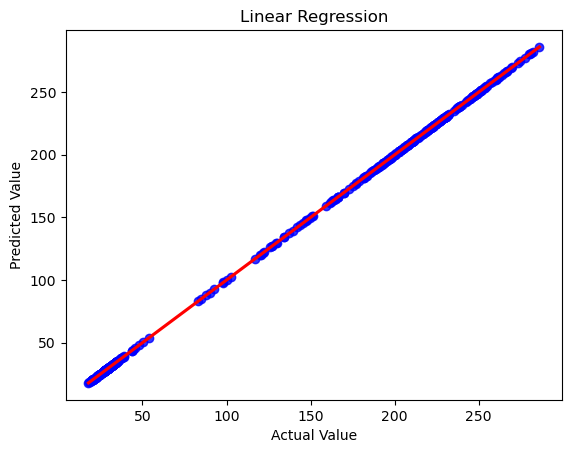

In [16]:
sns.regplot(x=y_test, y=y_pred_lin_reg, color='blue', line_kws={"color": "red"})
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression")
plt.show()

In [17]:
import pickle

with open("linear_regression_model", "wb") as file:
    pickle.dump(lin_reg, file)

### Project Building

In [18]:
app = Flask(__name__)
model = joblib.load('linear_regression_model')

In [19]:
@app.route("/")
def home(name = None):
    return render_template("index.html", name = name)

In [20]:
@app.route("/templates", methods = ["GET", "POST"])
def result():
    if (request.method == "POST"):
        Date = float(request.form.get('Date'))
        Open = float(request.form.get('Open'))
        High = float(request.form.get('High'))
        Low = float(request.form.get('Low'))
        Close = float(request.form.get('Close'))
        Volume = float(request.form.get('Volume'))
        
        inputs = [Date, Open, High, Low, Close, Volume]
        predict_value = model.predict([inputs])
        
        print("The inputs are:", inputs)
        print("The predicted value is:", predict_value)
        return render_template("result.html", prediction=predict_value)
    else:
        return render_template("result.html", prediction=-1)

In [21]:
if __name__== "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/Jul/2023 23:36:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jul/2023 23:36:49] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/Jul/2023 23:36:56] "POST /templates HTTP/1.1" 200 -


The inputs are: [2017.0, 257.0, 261.0, 254.270004, 255.729996, 4816600.0]
The predicted value is: [255.729996]


127.0.0.1 - - [15/Jul/2023 23:36:58] "GET / HTTP/1.1" 200 -
